In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data_dir = '~/data/twconv_2016_usersec'
data_dir = os.path.expanduser(data_dir)

# conversations

In [167]:
path = os.path.join(data_dir, 'conversations.csv')
ds = pd.read_csv(path, parse_dates=['timestamp'])
ds.shape, ds.conversation_id.nunique()

((42114, 14), 1539)

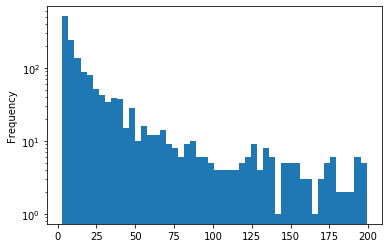

In [161]:
ds[ds.in_reply_to_status_id.isnull()].num_replies.plot.hist(bins=50)
plt.yscale('log')

# dialogs

In [27]:
path = os.path.join(data_dir, 'dialogs.csv')
dialogs = pd.read_csv(path, parse_dates=['timestamp'])
dialogs.shape, dialogs.dialog_id.nunique()

((26181, 16), 5655)

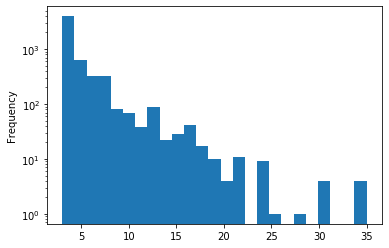

In [28]:
dialogs.groupby('dialog_id').size().plot.hist(bins=25)
plt.yscale('log')

# recsys

In [62]:
path = os.path.join(data_dir,'sampledata', 'dialogs_sample.csv')
dialogs = pd.read_csv(path)
dialogs.shape, dialogs.dialog_id.nunique()

((510, 4), 97)

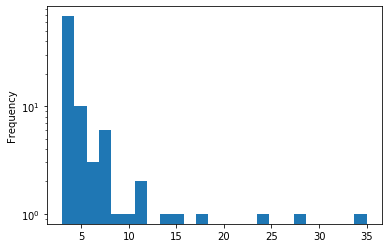

In [63]:
dialogs.groupby('dialog_id').size().plot.hist(bins=25)
plt.yscale('log')

In [64]:
path = os.path.join(data_dir,'alldata', 'train.csv')
train = pd.read_csv(path)
train.shape

(21326, 3)

In [49]:
train.head()

,source,target,flag
0,¡Feliz semana y feliz año para tod@s! La Revol...,¡Feliz semana y feliz año para tod@s! La Revol...,1
1,¡Feliz semana y feliz año para tod@s! La Revol...,Que de mi escriban y digan lo que quieran. Si ...,0
2,¡Feliz semana y feliz año para tod@s! La Revol...,"...de super carretera, ni soñadas antes de la ...",1
3,¡Feliz semana y feliz año para tod@s! La Revol...,Tenemos más camiones que donaciones para envia...,0
4,@MashiRafael Mientras los perros ladren signif...,"...de super carretera, ni soñadas antes de la ...",1


In [50]:
path = os.path.join(data_dir,'sampledata', 'test.csv')
test = pd.read_csv(path)
test.shape

(43, 8)

In [51]:
test.head()

,source,target0,target1,target2,target3,target4,target5,label
0,@forellanaroman @MashiRafael a ser otra venezu...,Zuly vive en El Relleno y es una sobreviviente...,Ya estamos al aire en @EcuadorTV junto a David...,Acaba de llegar una de nuestras patrullas de a...,Que de mi escriban y digan lo que quieran. Si ...,"La premiación al estilo ""Champions"" será otro ...","...de super carretera, ni soñadas antes de la ...",5
1,@jmartinezjorge @MashiRafael Podrá pagar algún...,"@DefensaEc al gobierno lo apoyamos con cal, at...",Conozco a Enner y sé lo responsable q es con t...,Y después nos dan lecciones de “libertad”: htt...,Qué manera de sufrir la gente. Nadie habló de ...,Ya estamos al aire en @EcuadorTV junto a David...,Por favor @DefensaEc déjennos seguir ayudando....,2
2,@roberto_guevar @RCiudadanaGye @MashiRafael @J...,Es muchísima la gente que ha confiado en nosot...,Zuly vive en El Relleno y es una sobreviviente...,Que jugador Alvez. Parece hecho para equipos c...,"No lo insulta. Le lanza un ""beso volado"". Corr...","No sean mentirosos diario @eluniversocom, les ...",Me da risa los insatisfechos que desacreditan ...,4
3,@MashiRafael por favor haga q paguen a los pro...,...Naranjal. Protegen en total 85000 ha. Con l...,Barcelona vende más camisetas que los 3 clube...,Barcelona vende más camisetas que los 3 clube...,Así trabajamos recibiendo SUS donaciones y lle...,"@DefensaEc al gobierno lo apoyamos con cal, at...",Qué manera de sufrir la gente. Nadie habló de ...,0
4,@MashiRafael @navasveracesar ! Y quizás puedas...,Qué manera de sufrir la gente. Nadie habló de ...,@TerraRobos #CasoTerrabienes la justicia que t...,A puertas de un feriado es prioritario valorar...,Qué manera de sufrir la gente. Nadie habló de ...,Quiero contarles q mi viejo salió de su contro...,¿Algún arquitecto con experiencia en diseños e...,1


In [52]:
path = os.path.join(data_dir,'sampledata', 'train_ids.csv')
train = pd.read_csv(path)

path = os.path.join(data_dir,'sampledata', 'valid_ids.csv')
valid = pd.read_csv(path)

path = os.path.join(data_dir,'sampledata', 'test_ids.csv')
test = pd.read_csv(path)

train.shape, valid.shape, test.shape

((366, 3), (51, 8), (43, 8))

In [53]:
train.head()

,source,target,flag
0,MashiRafael,684129141034188800,1
1,MashiRafael,723868795803197440,0
2,MashiRafael,684161784710852612,1
3,MashiRafael,722114517816197121,0
4,forellanaroman,684161784710852612,1


In [55]:
test.head()

,source,target0,target1,target2,target3,target4,target5,label
0,CumpleIndulac,731899303791300608,701947927279837184,723252289943789568,723868795803197440,807345026200203264,684161784710852612,5
1,yosoyelquesoy32,723265942755639296,784044215537893376,686013971086884864,697621603815923712,701947927279837184,723301197512347650,2
2,superjimmy27,725010403034537984,731899303791300608,753606972067446784,780262855450976257,686773318196789248,740898359813279744,4
3,gildatorres87,686886863047622656,697524353970409472,697518184522502144,724602042937913345,723265942755639296,697807962979573761,0
4,MMoyolem,697621603815923712,691446588762406913,810881938936524800,697807962979573761,719700455270588417,726085862728065025,1


In [58]:
test[test.source.isin(train.source)].source.nunique()

39